# Titanic Project - Kaggle
Overview

The data has been split into two groups:

    training set (train-titan.csv)
    test set (test-titan.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.
Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd

train = pd.read_csv('train-titan.csv')
test = pd.read_csv('test-titan.csv')

In [2]:
train.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape


(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    not_survived = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,not_survived])
    df.index = ['Survived','Not Survived']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

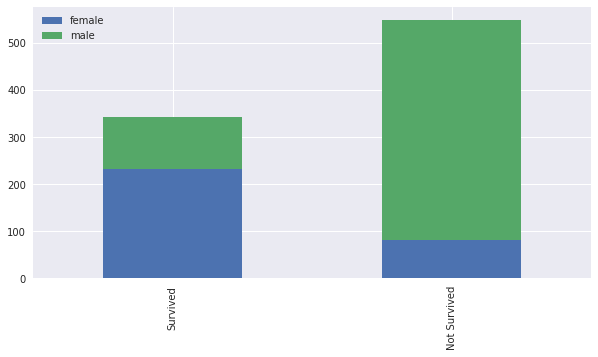

In [12]:
bar_chart('Sex')

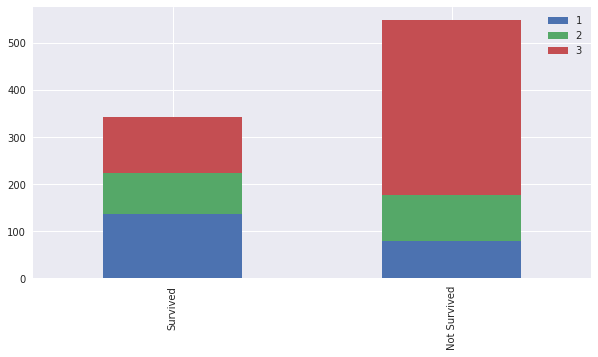

In [13]:
bar_chart('Pclass')

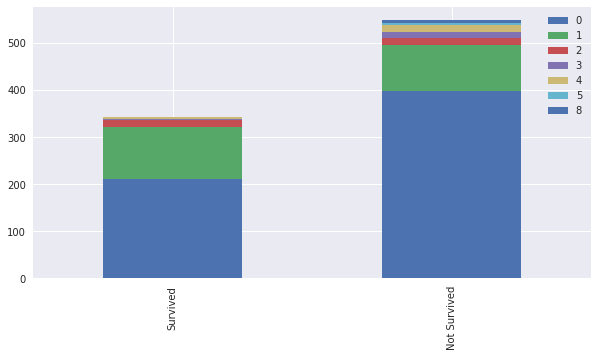

In [14]:
bar_chart('SibSp')

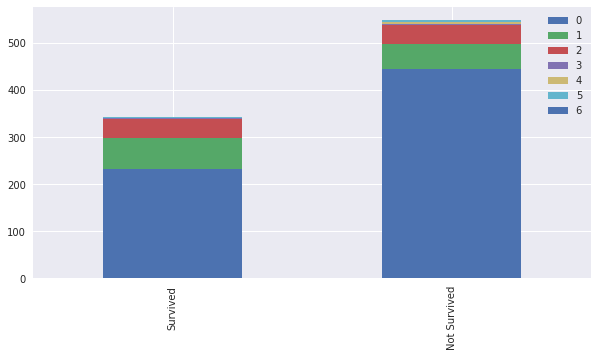

In [15]:
bar_chart('Parch')

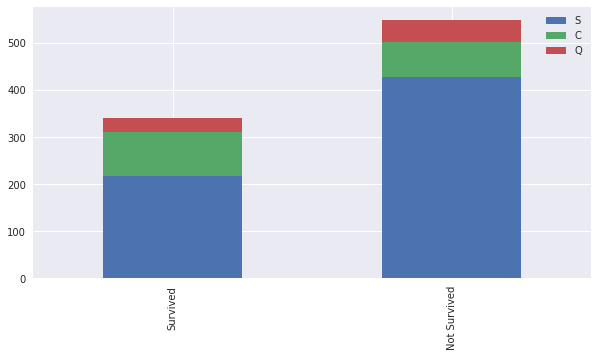

In [16]:
bar_chart('Embarked')

# Feature Engineering
Feature engineering is the process of using domain knowledge of the data
to create features (feature vectors) that make machine learning algorithms work.

feature vector is an n-dimensional vector of numerical features that represent some object.
Many algorithms in machine learning require a numerical representation of objects,
since such representations facilitate processing and statistical analysis.

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Name

In [20]:
train_test = [train, test] # combination of the train and test dataset

for data in train_test:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Lady          1
Countess      1
Capt          1
Mme           1
Sir           1
Don           1
Ms            1
Name: Title, dtype: int64

In [22]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

### Title mapping

In [23]:
map_title = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for data in train_test:
    data['Title'] = data['Title'].map(map_title)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


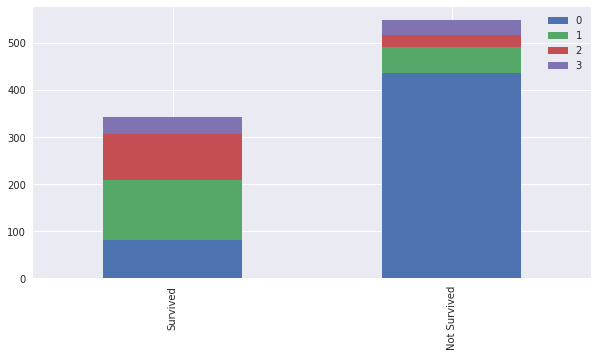

In [26]:
bar_chart('Title')

In [27]:
# deletion of unnecessary features from the dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [28]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


### Sex mapping
male:0 and female:1

In [30]:
map_sex = {"male": 0, "female": 1}
for data in train_test:
    data['Sex'] = data['Sex'].map(map_sex)

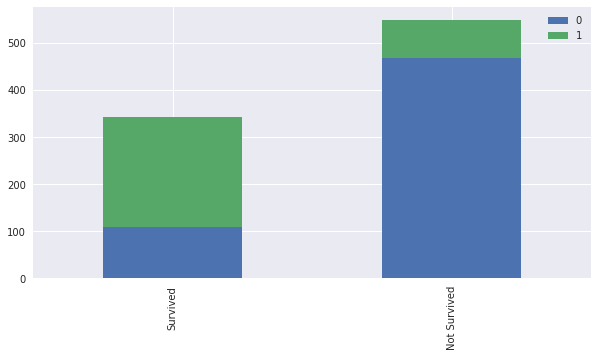

In [31]:
bar_chart('Sex')

In [32]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [33]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [34]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.00,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2


In [35]:
test.head(100)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,0,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,1,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,0,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,1,18.0,0,0,2657,7.2292,NaN,C,2
9,901,3,0,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [38]:
for data in train_test:
    data.loc[ data['Age'] <= 16, 'Age'] = 0,
    data.loc[(data['Age'] > 16) & (data['Age'] <= 26), 'Age'] = 1,
    data.loc[(data['Age'] > 26) & (data['Age'] <= 36), 'Age'] = 2,
    data.loc[(data['Age'] > 36) & (data['Age'] <= 62), 'Age'] = 3,
    data.loc[ data['Age'] > 62, 'Age'] = 4

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


### Embarked Values

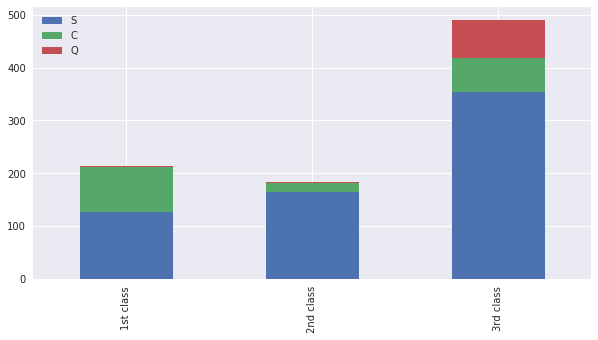

In [40]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [41]:
#filling all NaN in embarked with S embarked
for data in train_test:
    data['Embarked'] = data['Embarked'].fillna('S')

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [43]:
map_embark = {"S": 0, "C": 1, "Q": 2}
for data in train_test:
    data['Embarked'] = data['Embarked'].map(map_embark)

### Fare

In [44]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [45]:
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [46]:
train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
E101               3
F2                 3
D                  3
F33                3
B20                2
B77                2
B35                2
B51 B53 B55        2
C123               2
F G73              2
B57 B59 B63 B66    2
E121               2
D36                2
D26                2
B28                2
D17                2
E33                2
C126               2
C2                 2
B5                 2
E24                2
C78                2
B18                2
C93                2
C125               2
E67                2
                  ..
A36                1
C87                1
C99                1
C32                1
D10 D12            1
E17                1
E10                1
D19                1
C46                1
C91                1
B3                 1
D6                 1
C62 C64            1
E58                1
A34                1
E77                1
C30          

### Cabin

In [47]:
for data in train_test:
    data['Cabin'] = data['Cabin'].str[:1]

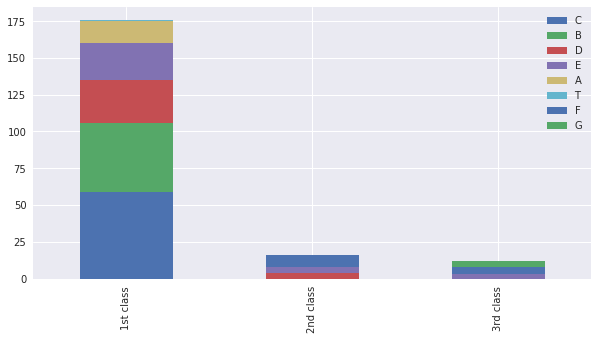

In [48]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [49]:
map_cabin = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for data in train_test:
    data['Cabin'] = data['Cabin'].map(map_cabin)


In [50]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### Family size

In [51]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [52]:
map_family = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for data in train_test:
    data['FamilySize'] = data['FamilySize'].map(map_family)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,53.1000,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,8.0500,2.0,0,0,0.0


In [54]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [55]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [56]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,7.2500,2.0,0,0,0.4
1,1,1,3.0,71.2833,0.8,1,2,0.4
2,3,1,1.0,7.9250,2.0,0,1,0.0
3,1,1,2.0,53.1000,0.8,0,2,0.4
4,3,0,2.0,8.0500,2.0,0,0,0.0
5,3,0,2.0,8.4583,2.0,2,0,0.0
6,1,0,3.0,51.8625,1.6,0,0,0.0
7,3,0,0.0,21.0750,2.0,0,3,1.6
8,3,1,2.0,11.1333,2.0,0,2,0.8
9,2,1,0.0,30.0708,1.8,1,2,0.4


# Modeling

In [57]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=50, shuffle=True, random_state=0)

In [60]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.77777778 0.77777778 0.5        0.66666667 0.77777778
 0.83333333 0.72222222 0.61111111 0.94444444 0.88888889 0.61111111
 0.61111111 0.83333333 0.72222222 0.61111111 0.77777778 0.61111111
 0.72222222 0.77777778 0.66666667 0.83333333 0.77777778 0.83333333
 0.66666667 0.83333333 0.83333333 0.61111111 0.61111111 0.72222222
 0.72222222 0.77777778 0.77777778 0.77777778 0.72222222 0.94444444
 0.61111111 0.83333333 0.66666667 0.77777778 0.61111111 0.76470588
 0.76470588 0.88235294 0.82352941 0.82352941 0.94117647 0.58823529
 0.82352941 0.82352941]


In [61]:
# kNN Score
round(np.mean(score)*100, 2)

74.92

### Decision Tree

In [62]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.88888889 0.77777778 0.55555556 0.77777778 0.88888889
 0.83333333 0.77777778 0.66666667 0.94444444 0.83333333 0.88888889
 0.77777778 0.88888889 0.83333333 0.72222222 0.83333333 0.72222222
 0.77777778 0.88888889 0.83333333 0.77777778 0.88888889 0.83333333
 0.77777778 0.83333333 0.94444444 0.77777778 0.61111111 0.83333333
 0.77777778 0.88888889 0.77777778 0.83333333 0.88888889 0.83333333
 0.66666667 0.83333333 0.83333333 0.72222222 0.72222222 0.82352941
 0.88235294 0.70588235 0.88235294 0.82352941 0.76470588 0.76470588
 0.82352941 0.70588235]


In [63]:
# decision tree Score
round(np.mean(score)*100, 2)

80.35

### RandomForest

In [64]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=11, scoring=scoring)
print(score)

[0.77777778 0.72222222 0.83333333 0.66666667 0.66666667 0.83333333
 0.77777778 0.83333333 0.83333333 0.94444444 0.94444444 0.72222222
 0.72222222 0.88888889 0.77777778 0.83333333 0.88888889 0.72222222
 0.72222222 0.72222222 0.83333333 0.88888889 0.77777778 0.94444444
 0.83333333 0.77777778 0.94444444 0.66666667 0.61111111 0.88888889
 0.77777778 0.94444444 0.77777778 0.83333333 0.77777778 0.88888889
 0.66666667 0.88888889 0.77777778 0.77777778 0.66666667 0.76470588
 0.76470588 0.64705882 0.94117647 0.88235294 0.76470588 0.58823529
 0.82352941 0.82352941]


In [65]:
# Random Forest Score
round(np.mean(score)*100, 2)

79.56

### Naive-Bayes

In [66]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=10, scoring=scoring)
print(score)

[0.88888889 0.88888889 0.83333333 0.72222222 0.66666667 0.77777778
 0.72222222 0.66666667 0.61111111 0.94444444 0.83333333 0.66666667
 0.77777778 0.94444444 0.66666667 0.72222222 0.77777778 0.72222222
 0.83333333 0.83333333 0.77777778 0.88888889 0.72222222 0.66666667
 0.72222222 0.88888889 0.94444444 0.66666667 0.83333333 0.83333333
 0.77777778 0.88888889 0.77777778 0.77777778 0.77777778 0.94444444
 0.66666667 0.94444444 0.72222222 0.72222222 0.72222222 0.82352941
 0.88235294 0.88235294 0.94117647 0.82352941 0.94117647 0.64705882
 0.94117647 0.88235294]


In [67]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

79.86

### SVM

In [68]:
#SVM
clf = SVC()
scoring = 'accuracy'
score1 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=10, scoring='accuracy')
print(score)

[0.88888889 0.88888889 0.83333333 0.72222222 0.66666667 0.77777778
 0.72222222 0.66666667 0.61111111 0.94444444 0.83333333 0.66666667
 0.77777778 0.94444444 0.66666667 0.72222222 0.77777778 0.72222222
 0.83333333 0.83333333 0.77777778 0.88888889 0.72222222 0.66666667
 0.72222222 0.88888889 0.94444444 0.66666667 0.83333333 0.83333333
 0.77777778 0.88888889 0.77777778 0.77777778 0.77777778 0.94444444
 0.66666667 0.94444444 0.72222222 0.72222222 0.72222222 0.82352941
 0.88235294 0.88235294 0.94117647 0.82352941 0.94117647 0.64705882
 0.94117647 0.88235294]


In [69]:
round(np.mean(score)*100,2)

79.86

## Testing of the trained data

Using

In [70]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [71]:
submit = pd.DataFrame({
        "Id_Passenger": test["PassengerId"],
        "Survival": prediction
    })

submit.to_csv('solution_titanic.csv', index=False)


In [72]:
submit = pd.read_csv('solution_titanic.csv')
submit.head(20)

,Id_Passenger,Survival
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
